In [84]:
import cv2
import pytesseract
import numpy as np
from matplotlib import pyplot as plt 

In [166]:
filename = "temp/crop_time.jpg"
image = cv2.imread(filename)

In [181]:
psm = '--psm 3'

#psm number for different images:
# crop_summary: 13
# crop_all:  6
# crop_ nums: 6
# crop_ time: 3
# see link for more details: https://stackoverflow.com/questions/44619077/pytesseract-ocr-multiple-config-options

### Method 1

In [182]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (1,1), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
kernel = np.ones((1,1),np.float32)/25
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, blur, iterations=1)

4:00.0

1:00.0
2:00.0
3:00.0
4:00,0



'4:00.0\n\n1:00.0\n2:00.0\n3:00.0\n4:00,0\n'

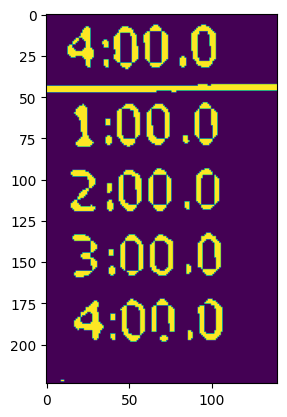

In [183]:
# Perform text extraction
data = pytesseract.image_to_string(opening, lang='eng', config=psm)
# data = pytesseract.image_to_string(opening, config="--psm 13 --oem 0 tessedit_char_whitelist=0123456789.:")
# NOTE: tried to greate a digit whitelist, did not work

print(data)
plt.imshow(opening)
data

for filename='temp/crop_summary' method1 works well: 4:00,0: - 1048 .1:54.5 31

However for other images (eg. crop_time), not so well: e832
sjoooen
e|Seeeo
tla mt

### Method 2 - bounding boxes

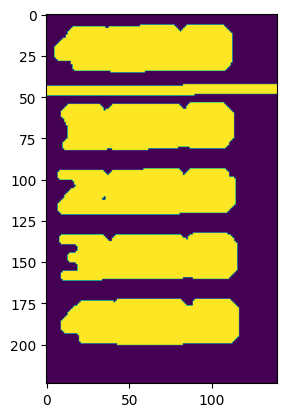

In [184]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0) #larger blur
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
kernal = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 2))
dilate = cv2.dilate(thresh, kernal, iterations=2)

plt.imshow(dilate)

In [185]:
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [186]:
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[0])

[]


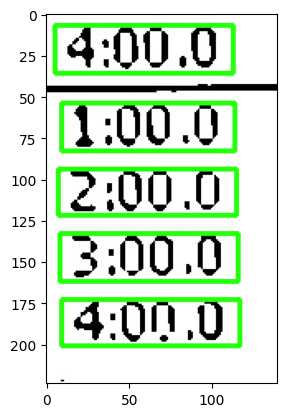

In [187]:
results  = []
img = image.copy()
for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    if h > 10 and 20 < w < 400:
        roi = img[y:y+h, x:x+h]
        cv2.rectangle(img, (x, y), (x+w, y+h), (36, 255, 12), 2)
        ocr_result = pytesseract.image_to_string(roi,lang='eng', config=psm )
        # ocr_result = ocr_result.split("\n")
        for item in ocr_result:
            results.append(item)
print(results)
plt.imshow(img)


note: I don't think bounding boxes work the way I think they do because the results with them don't come anywhere close. I'd expect len(results) to be 3 if there are three boxes but in this example (imagefile='temp/crop_summary.jpg') len(results)=9